In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=8ccafc0285b9178eabdc30ed0f0703700f05e9dc491cfb779238ae62bd939d58
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget
import gzip
import shutil
encoding='iso8859'
model_url = 'https://rusvectores.org/static/models/rusvectores4/unigrams/ruwikiruscorpora-nobigrams_upos_skipgram_300_5_2018.vec.gz'
m = wget.download(model_url)
with gzip.open(m, 'rb') as f_in:    
  with open('model.vec', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)


In [ ]:
import gensim

model2 = gensim.models.KeyedVectors.load_word2vec_format('/content/model.vec', binary=False)

In [ ]:
vocab = list(model2.wv.vocab)
print(vocab[:20])
print(len(vocab))  

['xxxx_NUM', 'год_NOUN', 'xx_NUM', 'xxx_NUM', 'категория_PROPN', 'человек_NOUN', 'время_NOUN', 'первый_ADJ', 'мочь_VERB', 'также_ADV', 'район_NOUN', 'город_NOUN', 'становиться_VERB', 'область_NOUN', 'новый_ADJ', 'россия_PROPN', 'место_NOUN', 'являться_VERB', 'часть_NOUN', 'иметь_VERB']
394332


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
model2.most_similar(positive=['пицца_NOUN','америка_NOUN' ], negative=['италия_NOUN'])

[('чизбургер_NOUN', 0.5079416036605835),
 ('шаурма_NOUN', 0.5070729851722717),
 ('гриль_NOUN', 0.4875603914260864),
 ('хот-дог_NOUN', 0.48222339153289795),
 ('гамбургер_NOUN', 0.476121723651886),
 ('кекс_NOUN', 0.4760088324546814),
 ('пончик_NOUN', 0.4667028486728668),
 ('беконый_NOUN', 0.46280455589294434),
 ('крекер_NOUN', 0.46277302503585815),
 ('рогалик_NOUN', 0.45930713415145874)]

In [ ]:
import numpy as np
v = model2['катастрофа_NOUN'] -model2['потоп_NOUN'] + model2['стихия_NOUN']
model2.most_similar(np.array([v]))

[('стихия_NOUN', 0.6431280970573425),
 ('катастрофа_NOUN', 0.6122231483459473),
 ('стихийный_ADJ', 0.4911259710788727),
 ('крушение_NOUN', 0.4785810708999634),
 ('лихачество_NOUN', 0.4291892349720001),
 ('бедствие_NOUN', 0.4277156591415405),
 ('прорыво_NOUN', 0.4202671945095062),
 ('авиакатастрофу_NOUN', 0.41637906432151794),
 ('повседневность_ADV', 0.41234174370765686),
 ('обыденщина_NOUN', 0.4106055498123169)]

In [ ]:
test_words = ['день_NOUN', 'это_PRCL', 'превращаться_VERB', 'также_ADV', 'город_NOUN', 'очень_ADV']

In [ ]:
#*************************************************************************************************************
x_ticks = [0]*len(test_words)
y_ticks = [0]*len(test_words)
j = -1
for word in test_words:
    # есть ли слово в модели? Может быть, и нет
    j+=1
    if word in model2:
        print(word)
        # выдаем 10 ближайших соседей слова:
        x_tick = []
        y_tick = []
        for i in model2.most_similar(positive=[word], topn=10):
            # слово + коэффициент косинусной близости
            x_tick.append(i[0])
            y_tick.append(i[1])
            print(i[0], i[1])
        print('\n')
        x_ticks[j] = x_tick
        y_ticks[j] = y_tick
    else:
        # Увы!
        print(word + ' нет в словаре')
        print('\n')

день_NOUN
неделя_NOUN 0.7242119312286377
месяц_NOUN 0.7178639769554138
утро_NOUN 0.6738513708114624
вечер_NOUN 0.6443345546722412
воскресенье_NOUN 0.6362559795379639
час_NOUN 0.632983386516571
накануне_ADV 0.6304810643196106
днями_NOUN 0.6276212334632874
днемя_NOUN 0.6210607886314392
ночь_NOUN 0.6077755689620972


это_PRCL нет в словаре


превращаться_VERB
превратиться_VERB 0.8403132557868958
превращать_VERB 0.8078837990760803
превратить_VERB 0.7195476293563843
трансформироваться_VERB 0.6430513858795166
превращение_NOUN 0.604975163936615
выродиться_VERB 0.5787158012390137
сделаться_VERB 0.5476139783859253
делаться_VERB 0.5368713140487671
перерождаться_VERB 0.5324591398239136
образовываться_VERB 0.5313812494277954


также_ADV
частность_NOUN 0.7505521774291992
наряду_ADV 0.6257230043411255
например_ADV 0.6165018081665039
включая_ADV 0.606814980506897
дртчк_NOUN 0.5780067443847656
ранее_ADV 0.55131995677948
включая_VERB 0.5364466905593872
равно_ADV 0.529866635799408
причем_NOUN 0.51966357

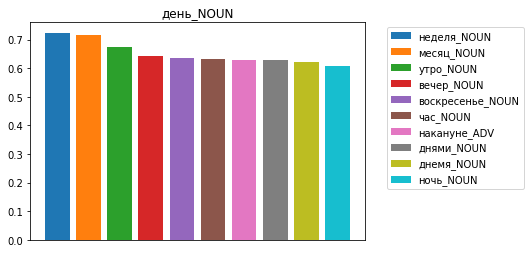



Слова нет в словаре




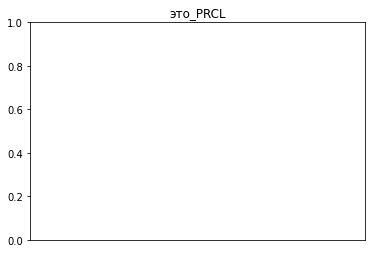

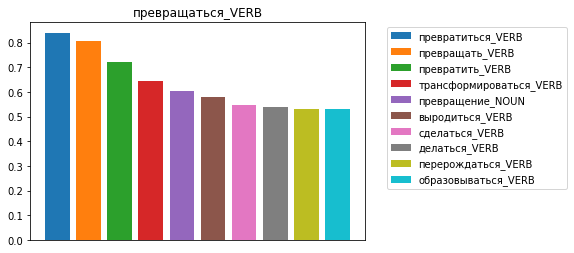

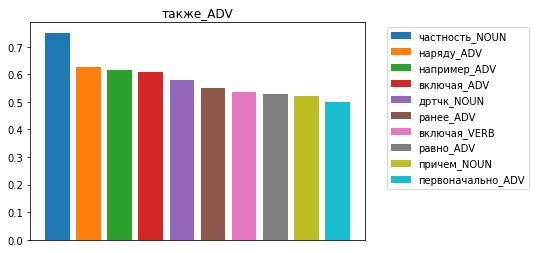

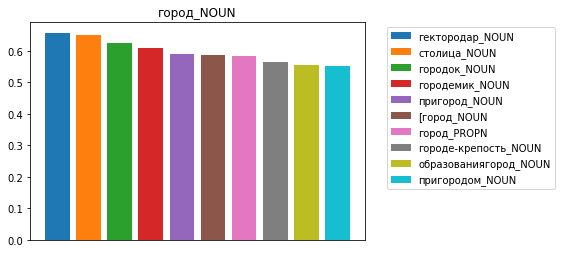

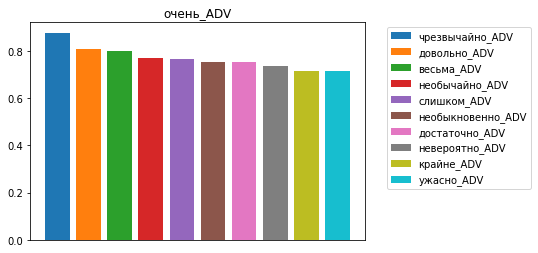

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for i in range (len(test_words)):
  plt.title(test_words[i])
  errr = False
  for j in range (10):
    if type(x_ticks[i]) is int:
      print('\n')
      print('Слова нет в словаре')
      errr = True
      print('\n')
      break
    else:
      plt.bar( x_ticks[i][j], y_ticks[i][j])
  plt.xticks([])
  if not errr:
    plt.legend(x_ticks[i] , bbox_to_anchor=(1.05, 1))
  plt.show()
  plt.close()